In [1]:
from utils import load_cnf, cnf_to_bqm
from embedding_utils import *
import seaborn as sns
from redundancy import *
from utils import *
from dwave.embedding.chain_strength import scaled

In [2]:
num_variables, num_clauses, variables, clauses = load_cnf(f"./sebastiani-sat/var100.cnf")
bqm, or_result_vars, clauses_qubits, _ = cnf_to_bqm(variables, clauses)
print(len(bqm.variables))

100


In [3]:
cnf_result = "1 -2 3 -4 -5 -6 7 -8 -9 -10 -11 -12 -13 14 -15 -16 -17 -18 -19 -20 -21 22 23 -24 -25 26 27 -28 29 -30 31 -32 -33 -34 -35 -36 -37 -38 -39 -40 41 -42 -43 -44 45 -46 -47 -48 -49 -50 -51 -52 53 -54 -55 -56 57 -58 -59 60 -61 62 63 -64 -65 -66 -67 -68 -69 -70 -71 -72 73 -74 -75 -76 -77 -78 79 80 -81 -82 -83 -84 -85 -86 -87 -88 89 -90 -91 -92 93 94 -95 -96 -97 98 -99 100 0".split(" ")
answer = dict()
for x in cnf_result[:-1]:
    int_x = int(x)
    answer[abs(int_x)] = int(int_x > 0)
evaluate_cnf_formula(answer, or_result_vars, bqm)


0.0

In [4]:
evaluate_clauses(answer, clauses)

True

In [5]:
# check that clauses of length 4 have only one bit==true
for clause in clauses:
    line = ""
    true_bits = 0
    for var in clause:
        line += f"{answer[abs(var)]}"
        if answer[abs(var)] == 1:
            true_bits +=1
    if len(clause) >2:
        assert(true_bits == 1)

<AxesSubplot:ylabel='Count'>

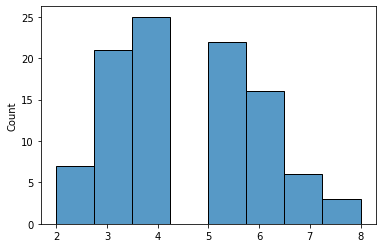

In [6]:
embedding = get_embedding(bqm, 1)
chain_lengths = []
for (key, chain) in embedding.items():
    chain_lengths.append(len(chain))
sns.histplot(chain_lengths)

In [7]:
sum(chain_lengths)

449

In [36]:
from greedy import SteepestDescentComposite
from dwave.system import DWaveCliqueSampler


qubit_offsets = get_0_qubits_offsets()
qpu_offsets = get_qubit_offset_ranges()
advance_annealing_of_unused(embedding, qubit_offsets)

In [37]:

for (logic_var, chain) in embedding.items():
    for c in chain:
        min_offset = get_min_offset(qpu_offsets, c)
        if bqm.linear[logic_var] != 0:
            qubit_offsets[c] = -0.3
#         else:
#             qubit_offsets[c] = 0.3

In [38]:
sampler = get_greedy_quantum_sampler(embedding)
sampleset = sampler.sample(bqm, 
                           num_reads=1000, 
                           anneal_offsets=qubit_offsets,
                           chain_strength=1.25, 
                           auto_scale=True)
print(sampleset.first.energy)
get_avg_energy(sampleset)

4.0


9.84

In [13]:
sampler = SteepestDescentComposite(DWaveCliqueSampler(solver={"name": "Advantage_system4.1"}))

In [22]:
sampleset = sampler.sample(bqm, 
                           num_reads=100, 
                           anneal_offsets=qubit_offsets,
                           chain_strength=1.25)
print(sampleset.first.energy)
get_avg_energy(sampleset)

5.0


9.08

In [30]:
bqm

BinaryQuadraticModel({1: -2.0, 2: -2.0, 3: -2.0, 4: -2.0, 5: -2.0, 6: -2.0, 7: -2.0, 8: -2.0, 9: -2.0, 10: -2.0, 11: -2.0, 12: -2.0, 13: -2.0, 14: -2.0, 15: -2.0, 16: -2.0, 17: -2.0, 18: -2.0, 19: -2.0, 20: -2.0, 21: -2.0, 22: -2.0, 23: -2.0, 24: -2.0, 25: -2.0, 26: -2.0, 27: -2.0, 28: -2.0, 29: -2.0, 30: -2.0, 31: -2.0, 32: -2.0, 33: -2.0, 34: -2.0, 35: -2.0, 36: -2.0, 37: -2.0, 38: -2.0, 39: -2.0, 40: -2.0, 41: -2.0, 42: -2.0, 43: -2.0, 44: -2.0, 45: -2.0, 46: -2.0, 47: -2.0, 48: -2.0, 49: -2.0, 50: -2.0, 51: -2.0, 52: -2.0, 53: -2.0, 54: -2.0, 55: -2.0, 56: -2.0, 57: -2.0, 58: -2.0, 59: -2.0, 60: -2.0, 61: -2.0, 62: -2.0, 63: -2.0, 64: -2.0, 65: -2.0, 66: -2.0, 67: -2.0, 68: -2.0, 69: -2.0, 70: -2.0, 71: -2.0, 72: -2.0, 73: -2.0, 74: -2.0, 75: -2.0, 76: -2.0, 77: -2.0, 78: -2.0, 79: -2.0, 80: -2.0, 81: -2.0, 82: -2.0, 83: -2.0, 84: -2.0, 85: -2.0, 86: -2.0, 87: -2.0, 88: -2.0, 89: -2.0, 90: -2.0, 91: -2.0, 92: -2.0, 93: -2.0, 94: -2.0, 95: -2.0, 96: -2.0, 97: -2.0, 98: -2.0, 99: -2.